In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.f' % x)

file_name_CARGO = "Контейнерные перевозки (просто сегменты).xlsx"
# df = open(file_name_CARGO, encoding='latin-1')
df = pd.read_excel(file_name_CARGO, skiprows=5, skipfooter=11, sheet_name="Сегменты", index_col=0)
df = df.drop(columns={"Рынок итого", "ЕТС итого", "Доля ЕТС"})
df = df.iloc[: , :-26]
df = df.fillna(df.mean())
df = df.T
df = df[['ЛПК', 'Химическая продукция', 'Машиностроение и металлообработка', 'Черная металлургия', 'Жидкие химикаты']]
# df.head()

file_name_TRAFFIC = "грузооборот по россии.xlsx"
TRAFFIC = pd.read_excel(file_name_TRAFFIC, skiprows=29, index_col=0).filter(['дата', 'грузооборот (млрд т-км)'])
# TRAFFIC.head()

file_name_VVP = "ввп.xlsx"
VVP = pd.read_excel(file_name_VVP, skiprows=32, index_col=0).filter(['дата', 'ВВП (млрд руб)'])
# VVP.head()

df.index.astype('datetime64[ns]')
VVP.index.astype('datetime64[ns]')
TRAFFIC.index.astype('datetime64[ns]')

new_df = df.merge(TRAFFIC, on=df.index)
new_df = new_df.rename(columns={'key_0': 'дата'})
new_df = new_df.set_index('дата')
new_df
new_df_2 = new_df.merge(VVP, on=new_df.index)
new_df_2 = new_df_2.rename(columns={'key_0': 'дата'})
new_df_2 = new_df_2.set_index('дата')
df = new_df_2
df = df.drop(columns={'Жидкие химикаты'})
df

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

standard_X = preprocessing.scale(X)
standard_Y = preprocessing.scale(y)

df
print(df.describe())

          ЛПК  Химическая продукция  Машиностроение и металлообработка  \
count      26                    26                                 26   
mean  1100362                550778                             493065   
std     86370                101429                              77908   
min    934602                358995                             350940   
25%   1029377                475154                             429508   
50%   1111964                581930                             492796   
75%   1166806                620690                             537508   
max   1249291                728507                             621705   

       Черная металлургия  грузооборот (млрд т-км)  ВВП (млрд руб)  
count                  26                       26              26  
mean               436364                      235            9009  
std                 90203                       11             844  
min                293906                      211       

In [27]:
# plt.scatter(df['ЛПК'], df['грузооборот (млрд т-км)'])
# plt.title('Поле корреляции')
# plt.xlabel('ЛПК')
# plt.ylabel('грузооборот (млрд т-км)')
# plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X[:,4].reshape(-1, 1), y, test_size=0.5, shuffle=False)

regressor = LinearRegression()
regressor.fit(X_test, y_test)

print("Остатки: ", regressor.intercept_)
print("\nКоэффициенты:")
list(zip(df, regressor.coef_))
# regressor.coef_

Остатки:  1062370.1320111696

Коэффициенты:


[('ЛПК', 10.457897870987285)]

Остатки:  777530.5717903695

Коэффициенты:
[('ЛПК', 29.485132209077253)]


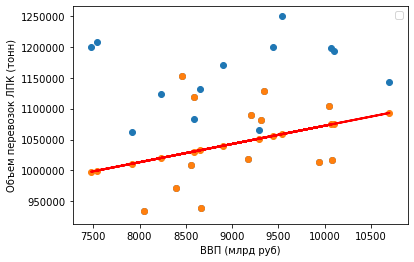

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X[:,4].reshape(-1, 1), y, test_size=0.8, shuffle=False)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Остатки: ", regressor.intercept_)
print("\nКоэффициенты:")
print(list(zip(df, regressor.coef_)))

y_pred = regressor.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred = pd.DataFrame(np.concatenate((y_train, y_pred)))
plt.legend(['Фактический объем перевозок ЛПК', 'Плановый обем перевозок ЛПК'])

plt.ylabel("Объем перевозок ЛПК (тонн)")
plt.xlabel(df.columns[5])
plt.scatter(X[:,4], y) #Обычный график скаттер
plt.scatter(X[:,4], pred[0]) #скаттер с предиктед Y
plt.plot(X[:,4].reshape(-1, 1), regressor.predict(X[:,4].reshape(-1, 1)), color='red', linewidth=2) #Линия регрессии
plt.show()

In [54]:
X = df.iloc[:, 1:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0., shuffle=False)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(f'R^2 статистика: {lin_reg.score(X, pred)}')

R^2 статистика: -3.721496199096973


In [30]:
from sklearn import metrics
print('Средняя абсолютная ошибка:', metrics.mean_absolute_error(y_test, y_pred))
print('Среднаяя квадратическая ошибка:', metrics.mean_squared_error(y_test, y_pred))
print('Среднеквадратическая ошибка:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Средняя абсолютная ошибка: 114417.07311802146
Среднаяя квадратическая ошибка: 16592014670.876463
Среднеквадратическая ошибка: 128809.99445259076


In [31]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

# i = -1
# for col in df.columns[1:7]:
#     i = i+1
#     X_train, X_test, y_train, y_test = train_test_split(X[:,i].reshape(-1, 1), y, test_size=0.5, shuffle=False)
#     regressor = LinearRegression()
#     regressor.fit(X_train, y_train)
#     print("Остатки: ", regressor.intercept_)
#     print("Коэффициенты:")
#     print(list(zip(df.columns[i], regressor.coef_)), "\n")

C:\Users\Roman\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Roman\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Roman\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Roman\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: Fu

ValueError: x and y must have same first dimension, but have shapes (26,) and (14,)

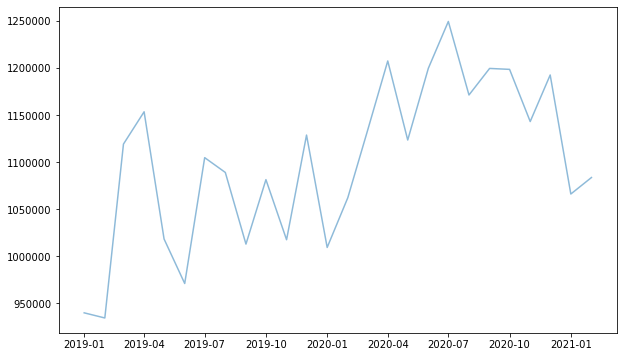

In [55]:
pred = pd.DataFrame(np.concatenate((y_train, y_pred)))
pred

plt.figure(figsize=(10, 6))
plt.plot(df.index, y[0:], alpha=0.5)
plt.plot(df.index, pred[0], alpha=0.5)
plt.legend(['Фактический объем перевозок ЛПК', 'Плановый обем перевозок ЛПК'])
plt.xlabel("Время")
plt.ylabel(df.columns[0] + " (тонн)")
plt.grid()
plt.show()